<a href="https://colab.research.google.com/github/kartik1d/-Abuse-Trend-Analysis-System/blob/main/Enhanced_Abuse_Trend_Analysis_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate synthetic data
np.random.seed(42)

num_records = 2000
user_ids = np.random.randint(1000, 1100, num_records)
content_types = np.random.choice(['text', 'image', 'video'], num_records)
statuses = np.random.choice(['approved', 'flagged', 'removed'], num_records)
timestamps = [datetime.now() - timedelta(days=np.random.randint(0, 365)) for _ in range(num_records)]
abuse_types = np.random.choice(['none', 'spam', 'harassment', 'hate_speech', 'violence'], num_records)
content = np.random.choice(['This is a test content', 'Abusive content example', 'Neutral content'], num_records)

data = {
    'user_id': user_ids,
    'content_type': content_types,
    'status': statuses,
    'timestamp': timestamps,
    'abuse_type': abuse_types,
    'content': content
}

df = pd.DataFrame(data)
df.to_csv('content_moderation_data.csv', index=False)
print("Synthetic dataset created successfully!")


Synthetic dataset created successfully!


In [11]:
from google.colab import files

# Upload your SQLite database file
uploaded = files.upload()

# List the uploaded files
for file_name in uploaded.keys():
    print(f'Uploaded file: {file_name}')


Saving content_moderation.db to content_moderation.db
Uploaded file: content_moderation.db


In [12]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('content_moderation.db')  # Ensure this matches your uploaded file name

# List all tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)
print(tables)

# Close the connection
conn.close()


                      name
0  content_moderation_data


In [13]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('content_moderation.db')  # Ensure this matches your uploaded file name

# Query to get the number of abusive content by type over time
query_abuse_trends = '''
    SELECT
        DATE(timestamp) as date,
        abuse_type,
        COUNT(*) as count
    FROM
        content_moderation_data
    WHERE
        abuse_type != 'none'
    GROUP BY
        DATE(timestamp), abuse_type
    ORDER BY
        DATE(timestamp)
'''

df_abuse_trends = pd.read_sql_query(query_abuse_trends, conn)

# Query to get the distribution of content types
query_content_distribution = '''
    SELECT
        content_type,
        COUNT(*) as count
    FROM
        content_moderation_data
    GROUP BY
        content_type
'''

df_content_distribution = pd.read_sql_query(query_content_distribution, conn)

# Query to get the status distribution
query_status_distribution = '''
    SELECT
        status,
        COUNT(*) as count
    FROM
        content_moderation_data
    GROUP BY
        status
'''

df_status_distribution = pd.read_sql_query(query_status_distribution, conn)

conn.close()
print("Data queried successfully!")


Data queried successfully!


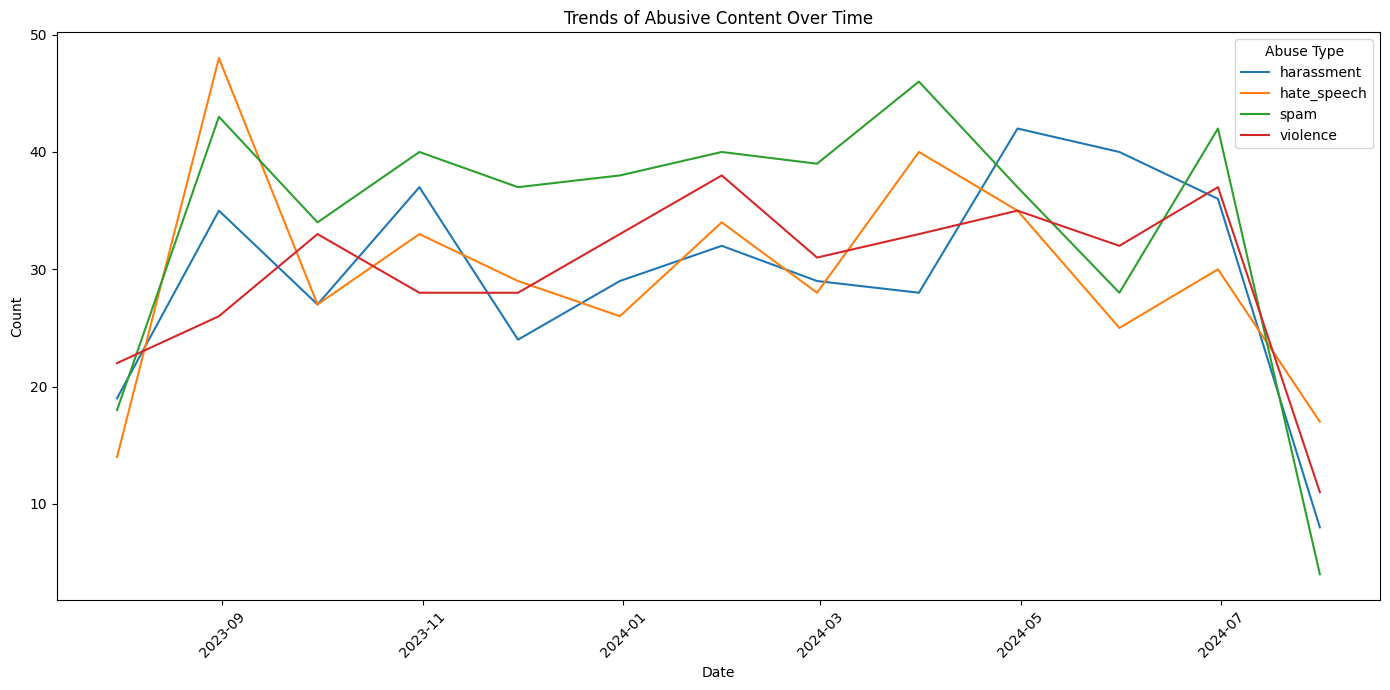

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_abuse_trends has been prepared
# Convert date strings to datetime objects and aggregate data
df_abuse_trends['date'] = pd.to_datetime(df_abuse_trends['date'])
df_abuse_trends.set_index('date', inplace=True)

# Aggregate data by month
df_abuse_trends_monthly = df_abuse_trends.groupby([pd.Grouper(freq='M'), 'abuse_type']).sum().reset_index()

# Plotting trends of abusive content over time
plt.figure(figsize=(14, 7))
for abuse_type in df_abuse_trends_monthly['abuse_type'].unique():
    subset = df_abuse_trends_monthly[df_abuse_trends_monthly['abuse_type'] == abuse_type]
    plt.plot(subset['date'], subset['count'], label=abuse_type)

plt.title('Trends of Abusive Content Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Abuse Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


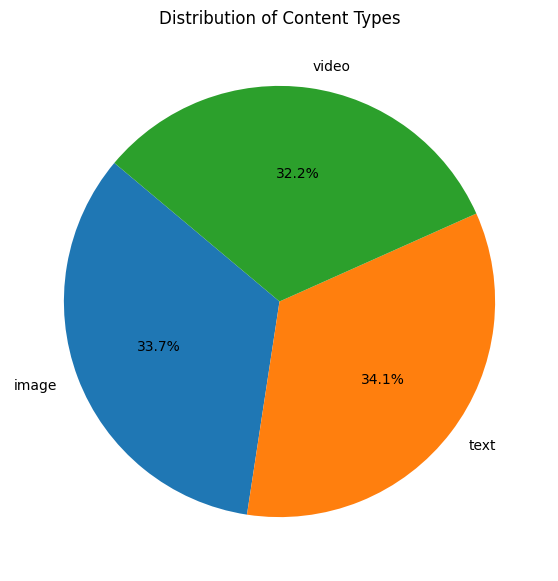

In [16]:
# Assuming df_content_distribution has been prepared
# Plotting distribution of content types
plt.figure(figsize=(7, 7))
plt.pie(df_content_distribution['count'], labels=df_content_distribution['content_type'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Types')
plt.show()


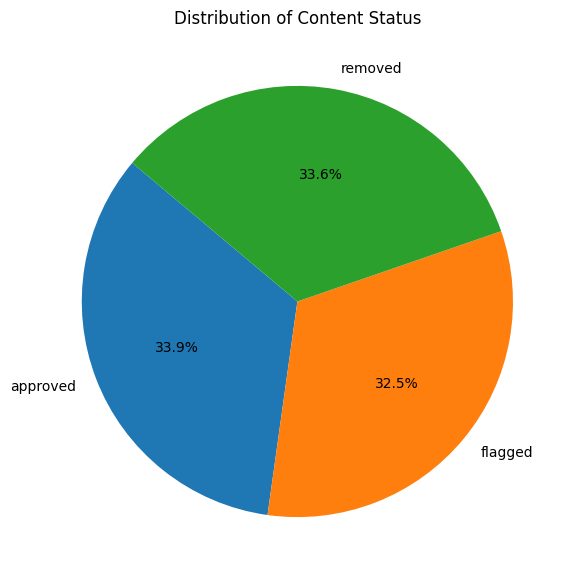

In [17]:
# Assuming df_status_distribution has been prepared
# Plotting distribution of content status
plt.figure(figsize=(7, 7))
plt.pie(df_status_distribution['count'], labels=df_status_distribution['status'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Status')
plt.show()


In [18]:
# Configure Git
!git config --global user.name "kartik1d"
!git config --global user.email "kartikkartik998@gmail.com"


In [19]:
# Clone the GitHub repository
!git clone https://github.com/kartik1d/-Abuse-Trend-Analysis-System.git


Cloning into '-Abuse-Trend-Analysis-System'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.
